In [2]:
import sys
import os
from platform import python_version 



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # randomly split data into test and train
from sklearn.ensemble import RandomForestClassifier # import classifier from sklearn 
from sklearn.neural_network import MLPClassifier  # import classifier from sklearn
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
 
data = pd.read_csv(os.getcwd() + "/titanicData/train.csv")  #1.  reads the csv file into DataFrame

# 1. print number of rows and columns
print('Number of rows and columns in the data: ', data.shape)

# 2. view top rows of the data set
print('Top handful of rows of data:')
print(data.head())



Number of rows and columns in the data:  (891, 12)
Top handful of rows of data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  

In [3]:

# 3. view bottom rows of the data set
print('Bottom handful of rows of data:')
print(data.tail())


Bottom handful of rows of data:
     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [4]:
# changing the categorical categorical data into numeric values for learning 
data.Sex = pd.Categorical(data.Sex)
data['Sex_code'] = data.Sex.cat.codes
data.Embarked = pd.Categorical(data.Embarked)
data['Embarked_code'] = data.Embarked.cat.codes

# remove rows of data that where values are inf or nan
clean_data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['Age','Fare'])

#print number of rows and columns
print("Number of rows and columns in the DataFrame:", clean_data.shape)

#view the bottom rows of the data
print("Bottom handful of rows of data:")
print(clean_data.tail())


Number of rows and columns in the DataFrame: (714, 14)
Bottom handful of rows of data:
     PassengerId  Survived  Pclass                                  Name  \
885          886         0       3  Rice, Mrs. William (Margaret Norton)   
886          887         0       2                 Montvila, Rev. Juozas   
887          888         1       1          Graham, Miss. Margaret Edith   
889          890         1       1                 Behr, Mr. Karl Howell   
890          891         0       3                   Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch  Ticket    Fare Cabin Embarked  Sex_code  \
885  female  39.0      0      5  382652  29.125   NaN        Q         0   
886    male  27.0      0      0  211536  13.000   NaN        S         1   
887  female  19.0      0      0  112053  30.000   B42        S         0   
889    male  26.0      0      0  111369  30.000  C148        C         1   
890    male  32.0      0      0  370376   7.750   NaN        Q         1   


In [5]:
y = clean_data['Survived']  # copying the target class into y

# create a list of input feature names X data, copy data into X
feature_names = [i for i in clean_data.columns if (clean_data[i].dtype in [np.int64, np.int8, np.float64] and (i != 'Survived'))]
X = clean_data[feature_names]



#1. split the data into train and evalution (test) sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#2. print the list of fetures inlcuded in X.
print('feature_names',feature_names)

#3. print the shpes of the test and train sets
print('train_X size',train_X.shape)
print('val_X size',val_X.shape)
print('train_y size',train_y.shape)
print('val_y size',val_y.shape)

#4. print the values of the test and train sets
print(f'Train X values:',train_X.shape)
print(f'Validation X values:',val_X.shape)
print(f'Train y values:',train_y.shape)
print(f'Validation y values:',val_y.shape)



feature_names ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_code', 'Embarked_code']
train_X size (535, 8)
val_X size (179, 8)
train_y size (535,)
val_y size (179,)
Train X values: (535, 8)
Validation X values: (179, 8)
Train y values: (535,)
Validation y values: (179,)


In [6]:
#train transparent box model
Tree_model = tree.DecisionTreeClassifier(max_depth=5).fit(train_X, train_y)

#predict test data labels using transparent box model
Tree_pred_val_y = Tree_model.predict(val_X)



#1. Train black box models
BB1_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=1).fit(train_X, train_y)
BB2_model = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5).fit(train_X, train_y)

#2. create predicition lables for each model
BB1_pred_val_y = BB1_model.predict(val_X)
BB2_pred_val_y = BB2_model.predict(val_X)




Tree accuracy =  0.8547486033519553
Tree f1 score =  0.803030303030303

Black box model 1, accuracy =  0.7597765363128491
Black box model 1, f1 score =  0.6055045871559633

Black box model 2, accuracy =  0.8770949720670391
Black box model 2, f1 score =  0.8166666666666667


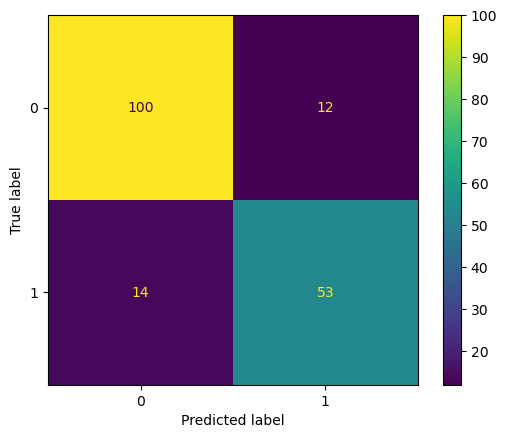

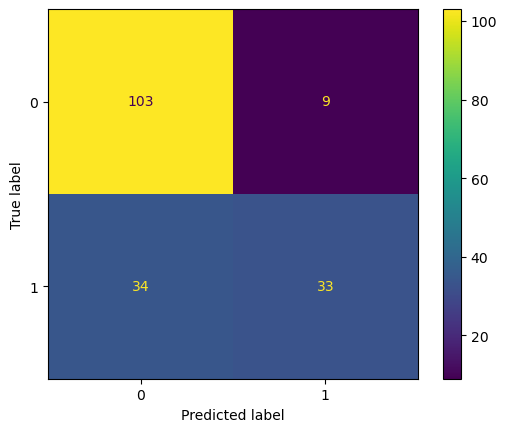

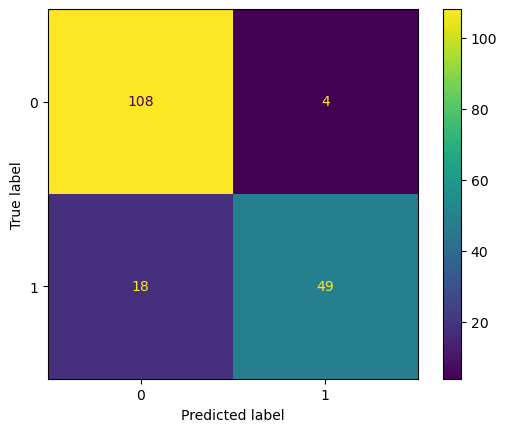

In [7]:
###### import metrics from sklearn ###################
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import recall
#from sklearn.metrics import precision

Tree_acc = accuracy_score(val_y, Tree_pred_val_y)
Tree_f1 = f1_score(val_y, Tree_pred_val_y)
print('\nTree accuracy = ', Tree_acc)
print('Tree f1 score = ', Tree_f1)
disp_bb0 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(val_y, Tree_pred_val_y), display_labels=Tree_model.classes_)
disp_bb0.plot()


#1. calculate & preint performce score for BB1
BB1_acc = accuracy_score(val_y, BB1_pred_val_y)
BB1_f1 = f1_score(val_y, BB1_pred_val_y)
print('\nBlack box model 1, accuracy = ', BB1_acc)
print('Black box model 1, f1 score = ', BB1_f1)
disp_bb1 =ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(val_y, BB1_pred_val_y), display_labels=BB1_model.classes_)
disp_bb1.plot()

#2. calculate & print performce score for BB2
BB2_acc = accuracy_score(val_y, BB2_pred_val_y)
BB2_f1 = f1_score(val_y, BB2_pred_val_y)
print('\nBlack box model 2, accuracy = ', BB2_acc)
print('Black box model 2, f1 score = ', BB2_f1)
disp_bb2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(val_y, BB2_pred_val_y), display_labels=BB1_model.classes_)
disp_bb2.plot()



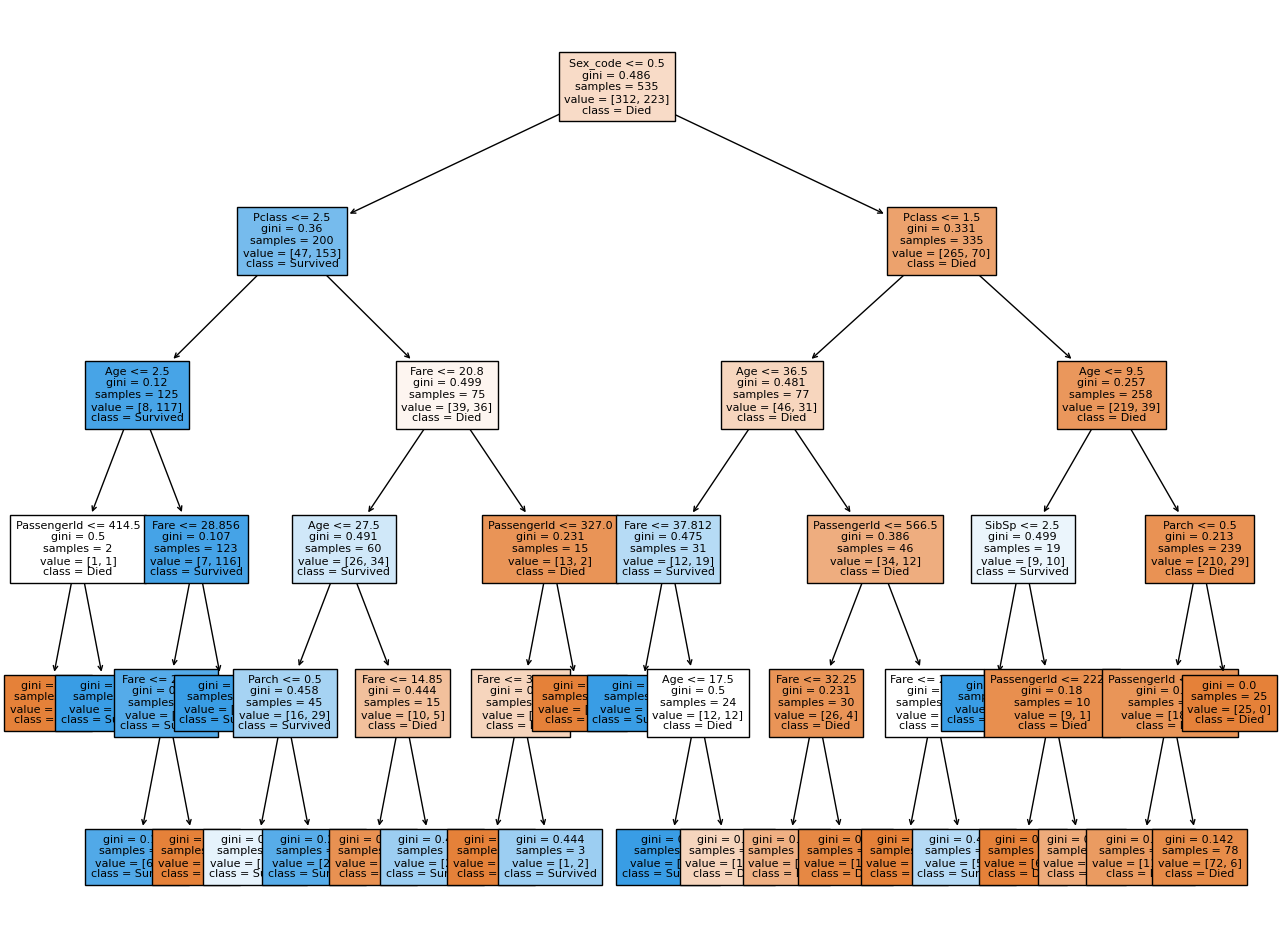

In [8]:
plt.figure(figsize=(16,12))
tree.plot_tree(Tree_model, class_names = ['Died','Survived'], feature_names = feature_names, fontsize=8, filled=True) 
plt.show()

In [9]:
def Permutation_Scores(m, D, K):
    """
    A function that calculates feature importance for a range of input features, j, 
    for a given classificaiton model , m.
    
    Input:
    m - classification model
    D - DataFrame, oringal imput data (non perumtated).
    K - integer, the number or permutaions for each feature
    
    Output:
    s_ - numpy array (size: j,K) of scores (accuracy) for each feature, j, and perumtation, k.
    """
    
    # set-up some varibles for the loops 
    f = list(D.columns)     # list of feature names in test data 
    j_count = 0             # varible to count which feautre is being worked on
    
  
    
    ##1. create an array of zeros f rows (number of fetures) and K columns ( number of permutations)    
    s_ = np.zeros((len(f), K))
    
    #2. loop over each feature, f_j (columns in D)
    for j in f:      
        
        #3. loop to create multiple permutated feture columns for a given feature, f
        for k in range(K):    

            D_kj = D.copy()  # make a copy of the data set to shuffle the feature 

            #4. permutate the values in the column D realteing to feature j
            D_kj.loc[:,(j)] = np.random.permutation(D[j])

            #5. make new prediction for test data D_j,k
            pred = m.predict(D_kj)
            
            #6. calcaute new score s_k,j
            s_[j_count,k] = accuracy_score(pred, m.predict(D))
            
    
        j_count +=1
    #7. return array of scores
    return s_



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5).fit(train_X, train_y)
s_ = Permutation_Scores(model, val_X, 4)

model_pred_val_y = model.predict(val_X)
model_acc = accuracy_score(val_y, model_pred_val_y)

print('Shape of array',s_.shape)
print('Values of s_',s_)

Shape of array (8, 4)
Values of s_ [[0.96089385 0.94972067 0.96648045 0.95530726]
 [0.87150838 0.88826816 0.89944134 0.91061453]
 [0.90502793 0.94413408 0.89385475 0.88826816]
 [0.94972067 0.96648045 0.96089385 0.98324022]
 [0.99441341 1.         0.99441341 0.98882682]
 [0.95530726 0.91620112 0.94972067 0.95530726]
 [0.74860335 0.74860335 0.72067039 0.76536313]
 [0.96648045 0.95530726 0.96089385 0.95530726]]


In [11]:
K = 100


#1. calc permunation scores using your function   
s_ = Permutation_Scores(model, val_X, K)

#2. set s to the score achived by the model on the original data 
s = model_acc

#### END CODE ######

perm_list = []       # set an empty list to capture permutation importance
D_columns= list(val_X.columns) 

for f in range(len(D_columns)):   # loop over all features 

    #### START CODE ####
    
    #3. calculate avergae i for each feature , j
    i = s - (1/K) * np.sum(s_[f])
    m =(1/K) * np.sum(s_[f])
    var = (1/K) * np.sum((s_[f] - m)**2)
    
    #### END CODE ######

    # save Permutation Importance to output list 
    feat = [D_columns[f], i, var]
    perm_list.append(feat)

# print the Permutation Importance for each feature in order of greatest to smallest i
perm_list.sort(key = lambda x: x[1], reverse=True)  
for row in perm_list:
     print (row)

['Sex_code', 0.11698324022346362, 0.0004823944321338285]
['Pclass', -0.012513966480446892, 0.00023976779750944105]
['Age', -0.02486033519553066, 0.0001544115352204989]
['Fare', -0.0699441340782122, 0.0001419930713772981]
['PassengerId', -0.07312849162011148, 0.00010367653943385067]
['Embarked_code', -0.08642458100558648, 8.954464592241204e-05]
['SibSp', -0.09262569832402245, 6.065977965731397e-05]
['Parch', -0.1094972067039105, 4.3694017040666545e-05]


In [12]:
######### import the libary that runs Permutation Importance ######
import eli5
from eli5.sklearn import PermutationImportance 

########## run Permutation Importance and print results ##########
Tree_perm = PermutationImportance(Tree_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(Tree_perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1989 ± 0.0343,Sex_code
0.1542 ± 0.0384,Pclass
0.1084 ± 0.0313,Age
0.0223 ± 0.0071,SibSp
0.0168 ± 0.0387,Fare
0.0156 ± 0.0179,PassengerId
0 ± 0.0000,Embarked_code
0 ± 0.0000,Parch


In [13]:


BB1_perm = PermutationImportance(BB1_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(BB1_perm, feature_names = val_X.columns.tolist())



Weight,Feature
0.1207 ± 0.0350,Fare
0.0581 ± 0.0219,Sex_code
0.0190 ± 0.0167,SibSp
0.0134 ± 0.0114,Parch
0.0078 ± 0.0167,Embarked_code
0.0011 ± 0.0045,Pclass
-0.0078 ± 0.0270,PassengerId
-0.0134 ± 0.0152,Age


In [14]:


BB2_perm = PermutationImportance(BB2_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(BB2_perm, feature_names = val_X.columns.tolist())



Weight,Feature
0.1955 ± 0.0381,Sex_code
0.0860 ± 0.0279,Pclass
0.0648 ± 0.0313,Age
0.0335 ± 0.0234,Fare
0.0324 ± 0.0179,PassengerId
0.0179 ± 0.0217,Embarked_code
0.0156 ± 0.0084,Parch
0.0101 ± 0.0164,SibSp


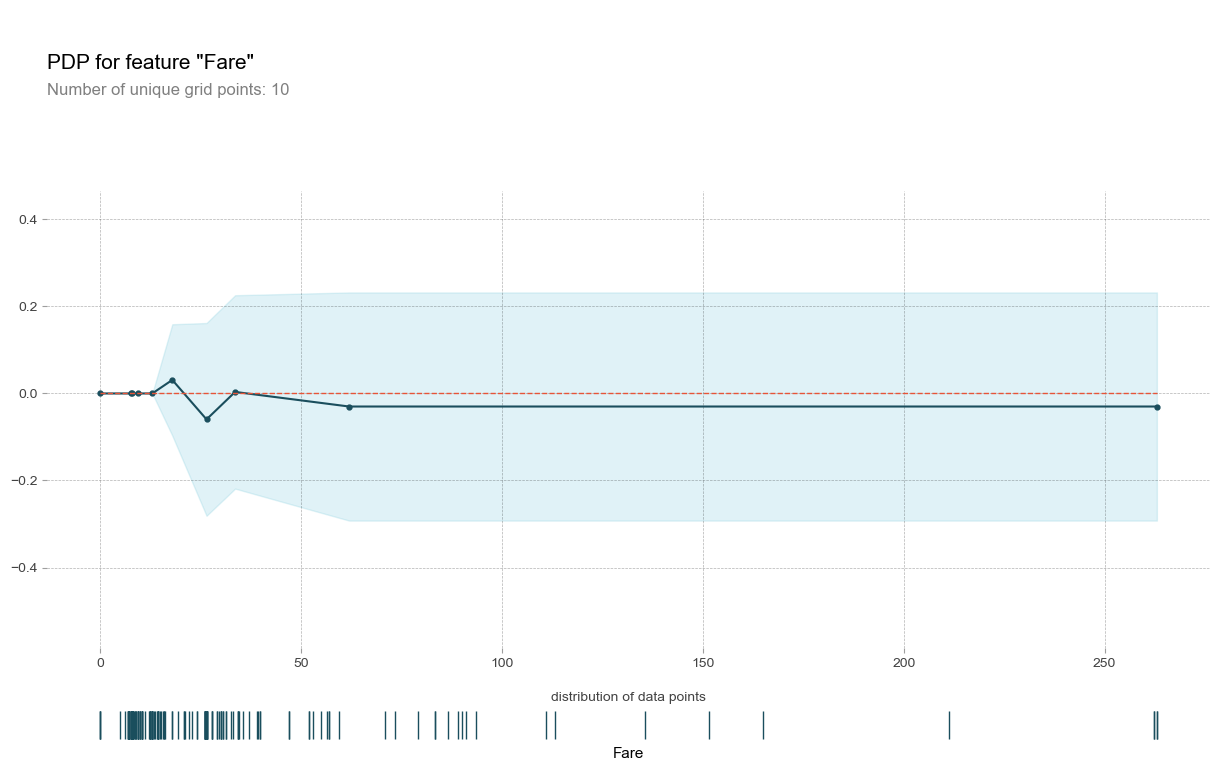

In [15]:
#import PDP library
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Fare')

# plot it
pdp.pdp_plot(pdp_Survive, 'Fare',plot_pts_dist=True)
plt.show()

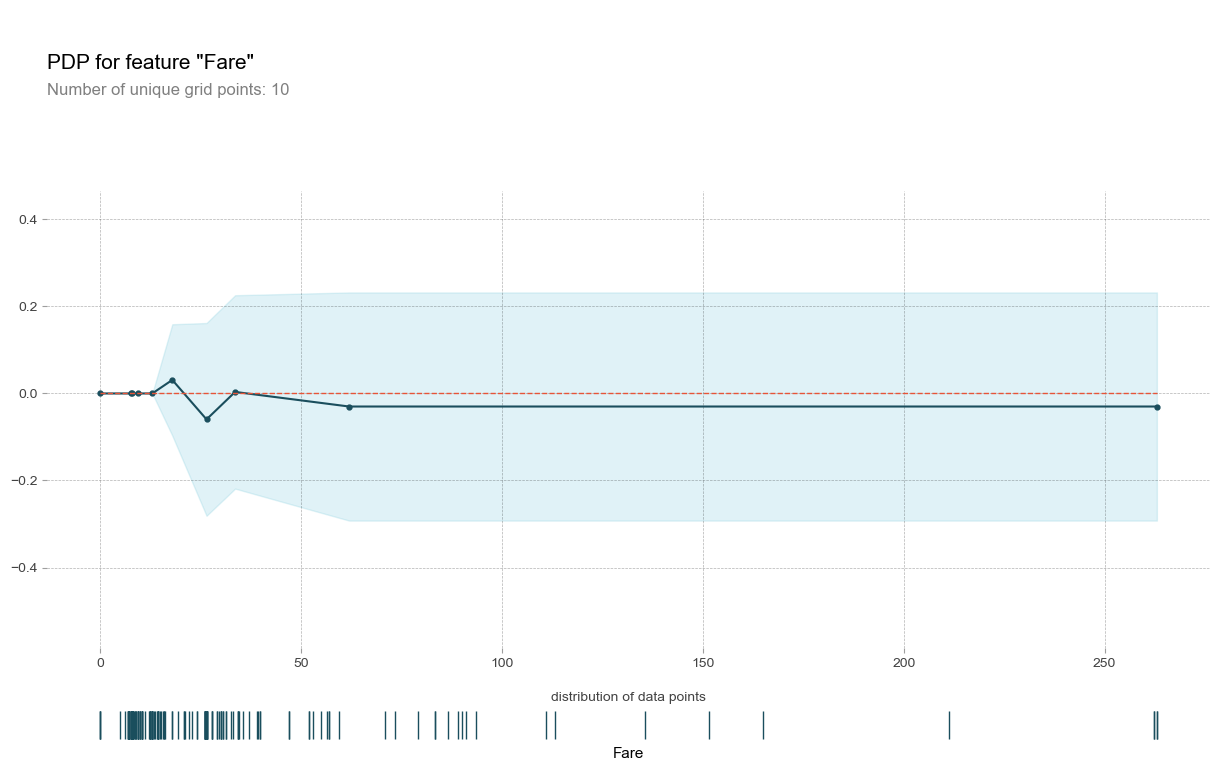

In [16]:


#1. Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Fare')

#2. plot it
pdp.pdp_plot(pdp_Survive, 'Fare', plot_pts_dist=True)
plt.show()


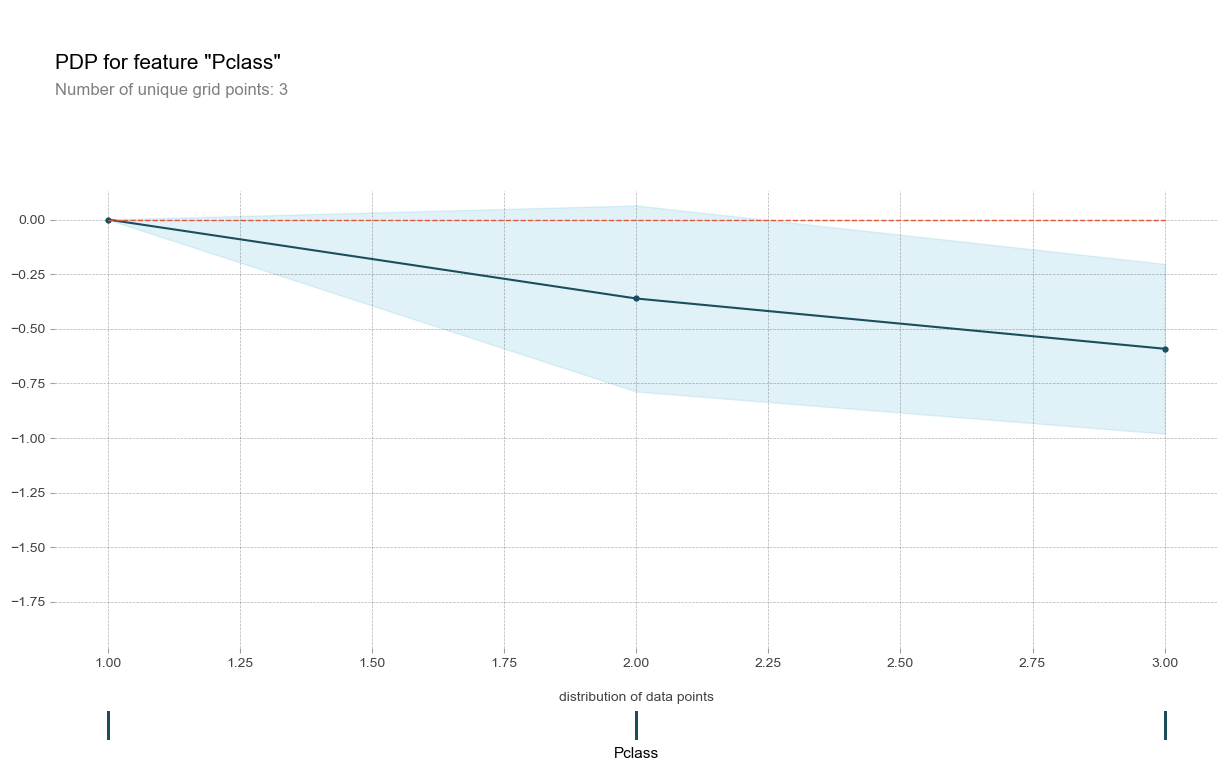

In [17]:
#Feature 1: Pclass

# Create the data that we will plot
pdp_Pclass_tree = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Pclass')

# Plot it
pdp.pdp_plot(pdp_Pclass_tree, 'Pclass', plot_pts_dist=True)
plt.show()


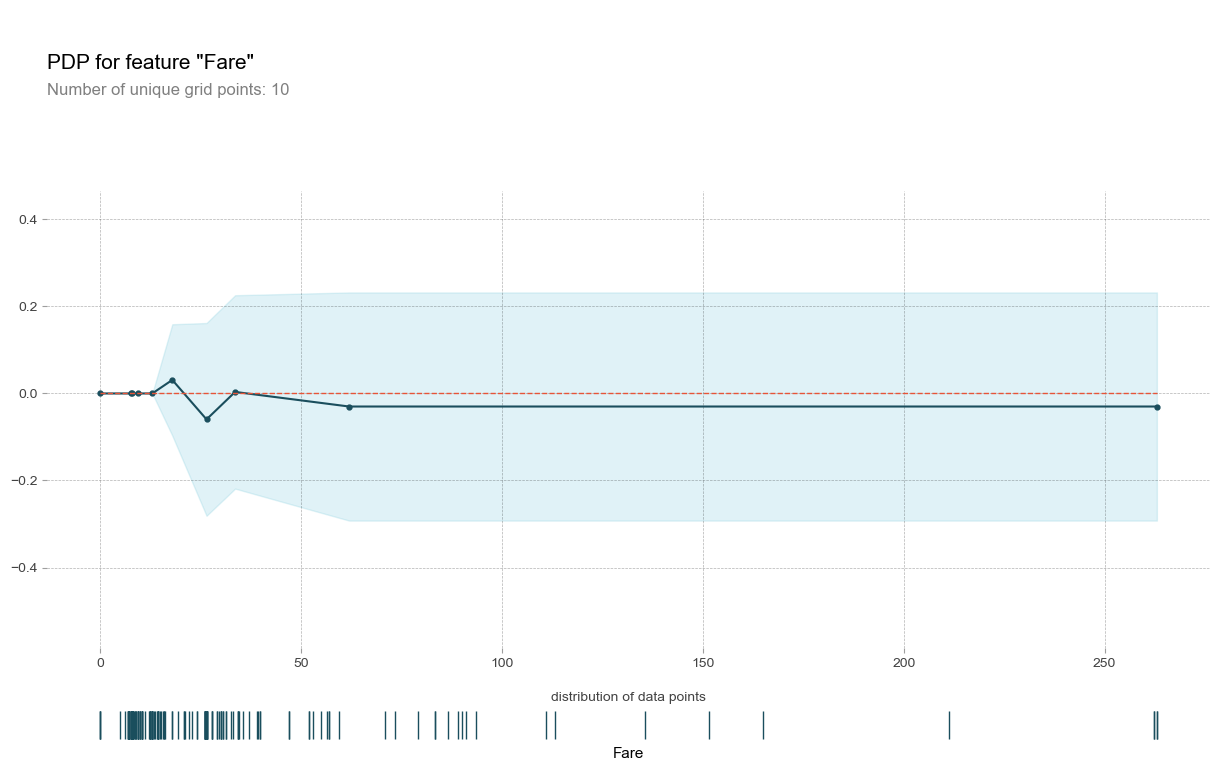

In [18]:
#Feature 2: Fare

# Create the data that we will plot
pdp_Fare_tree = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Fare')

# Plot it
pdp.pdp_plot(pdp_Fare_tree, 'Fare', plot_pts_dist=True)
plt.show()

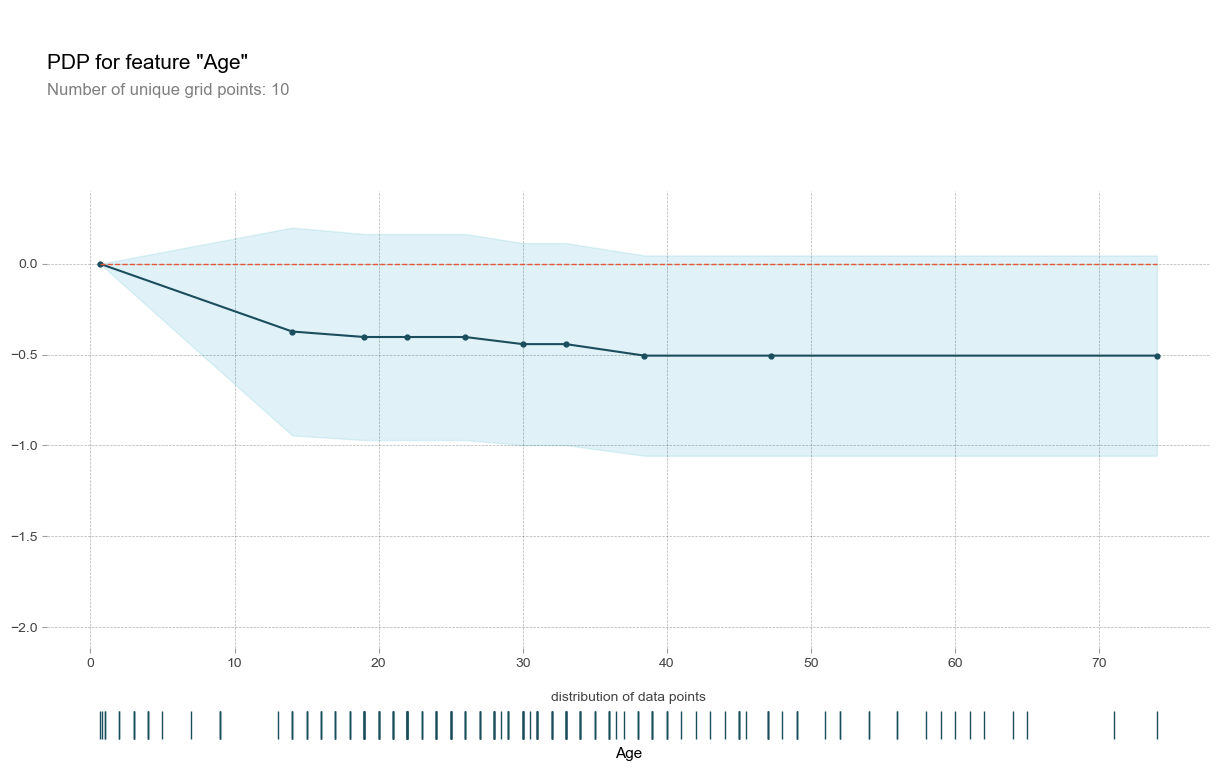

In [19]:
#Feature 3: Age

# Create the data that we will plot
pdp_Age_tree = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Age')

# Plot it
pdp.pdp_plot(pdp_Age_tree, 'Age', plot_pts_dist=True)
plt.show()


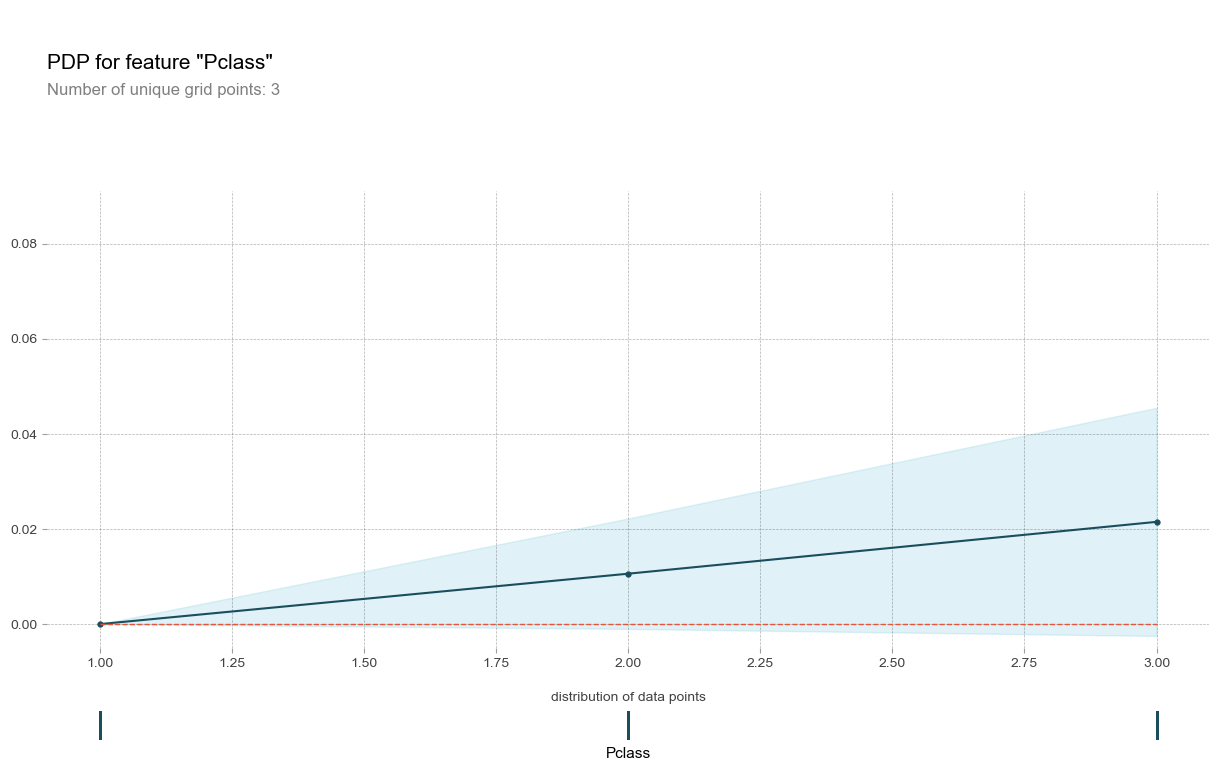

In [20]:
#Feature 1: Pclass

# Create the data that we will plot
pdp_Pclass_BB1 = pdp.pdp_isolate(model=BB1_model, dataset=val_X, model_features=feature_names, feature='Pclass')

# Plot it
pdp.pdp_plot(pdp_Pclass_BB1, 'Pclass', plot_pts_dist=True)
plt.show()

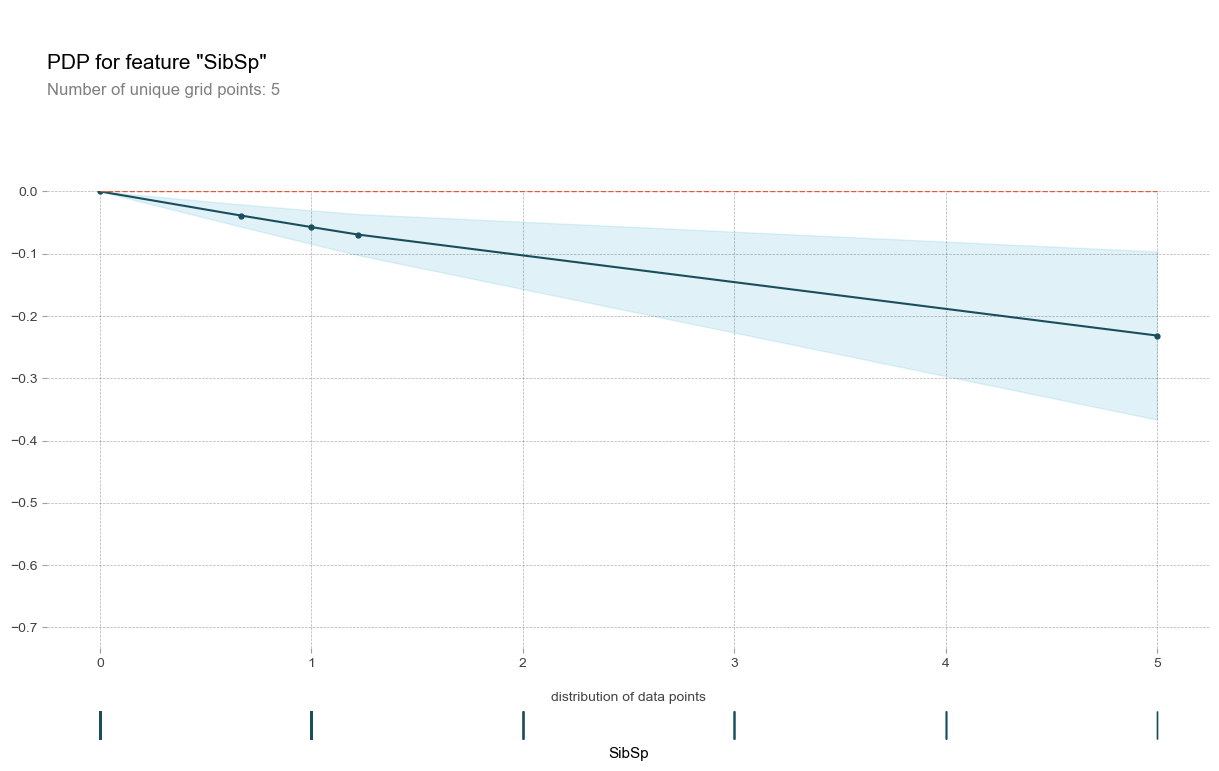

In [21]:
#Feature 2: PassengerId

# Create the data that we will plot
pdp_SibSp_BB1 = pdp.pdp_isolate(model=BB1_model, dataset=val_X, model_features=feature_names, feature='SibSp')

# Plot it
pdp.pdp_plot(pdp_SibSp_BB1, 'SibSp', plot_pts_dist=True)
plt.show()

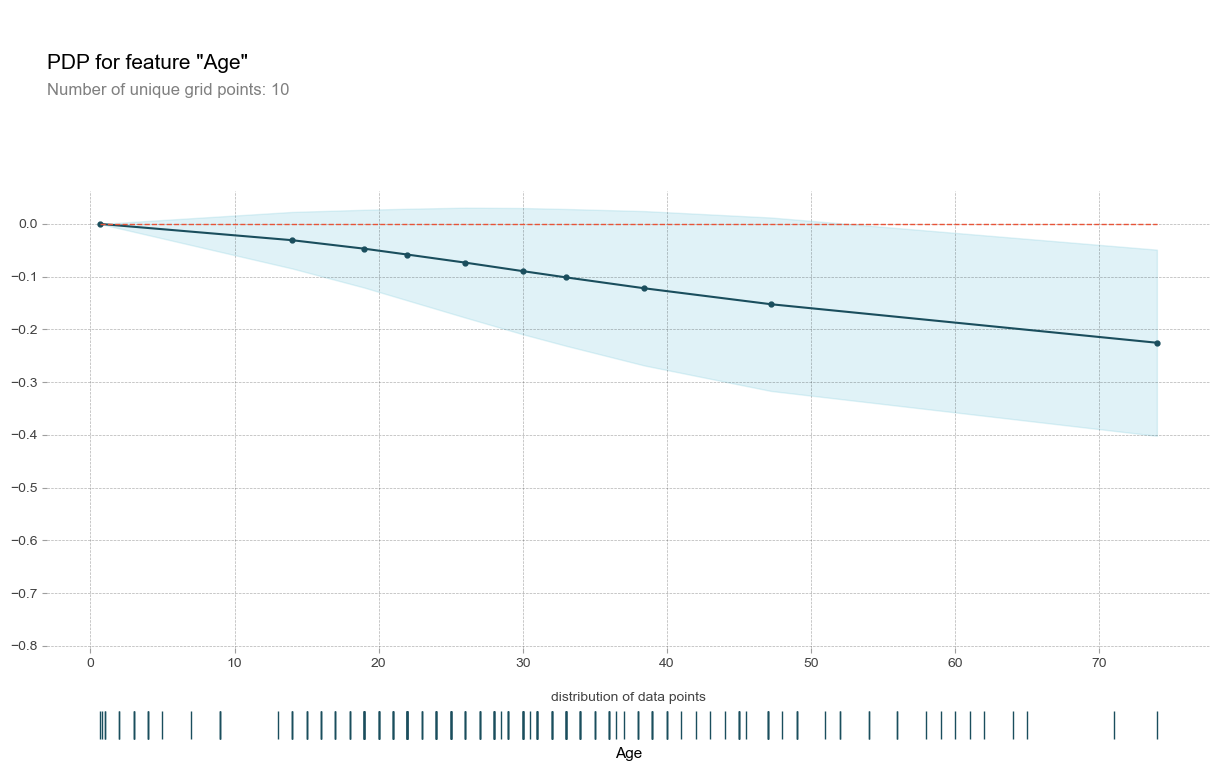

In [22]:
#Feature 3: Age

# Create the data that we will plot
pdp_Age_BB1 = pdp.pdp_isolate(model=BB1_model, dataset=val_X, model_features=feature_names, feature='Age')

# Plot it
pdp.pdp_plot(pdp_Age_BB1, 'Age', plot_pts_dist=True)
plt.show()

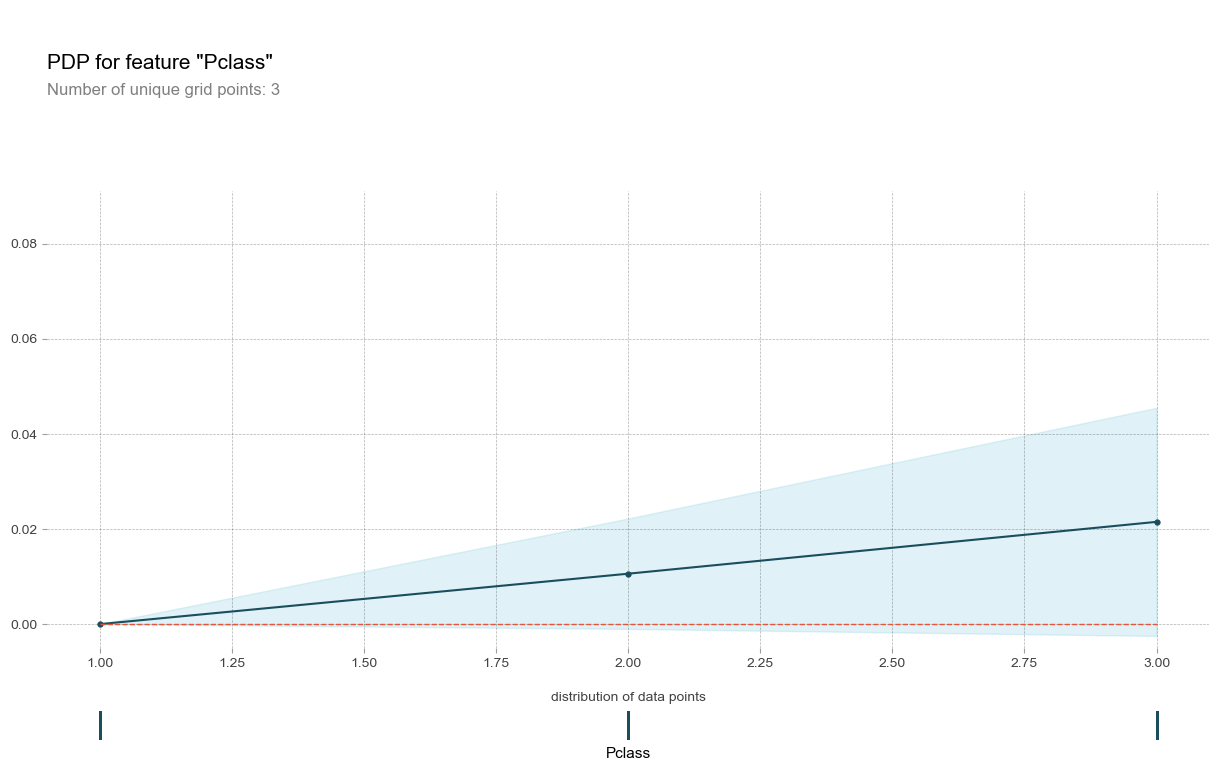

In [23]:
#Feature 1: Pclass

# Create the data that we will plot
pdp_Pclass_BB2 = pdp.pdp_isolate(model=BB2_model, dataset=val_X, model_features=feature_names, feature='Pclass')

# Plot it
pdp.pdp_plot(pdp_Pclass_BB1, 'Pclass', plot_pts_dist=True)
plt.show()

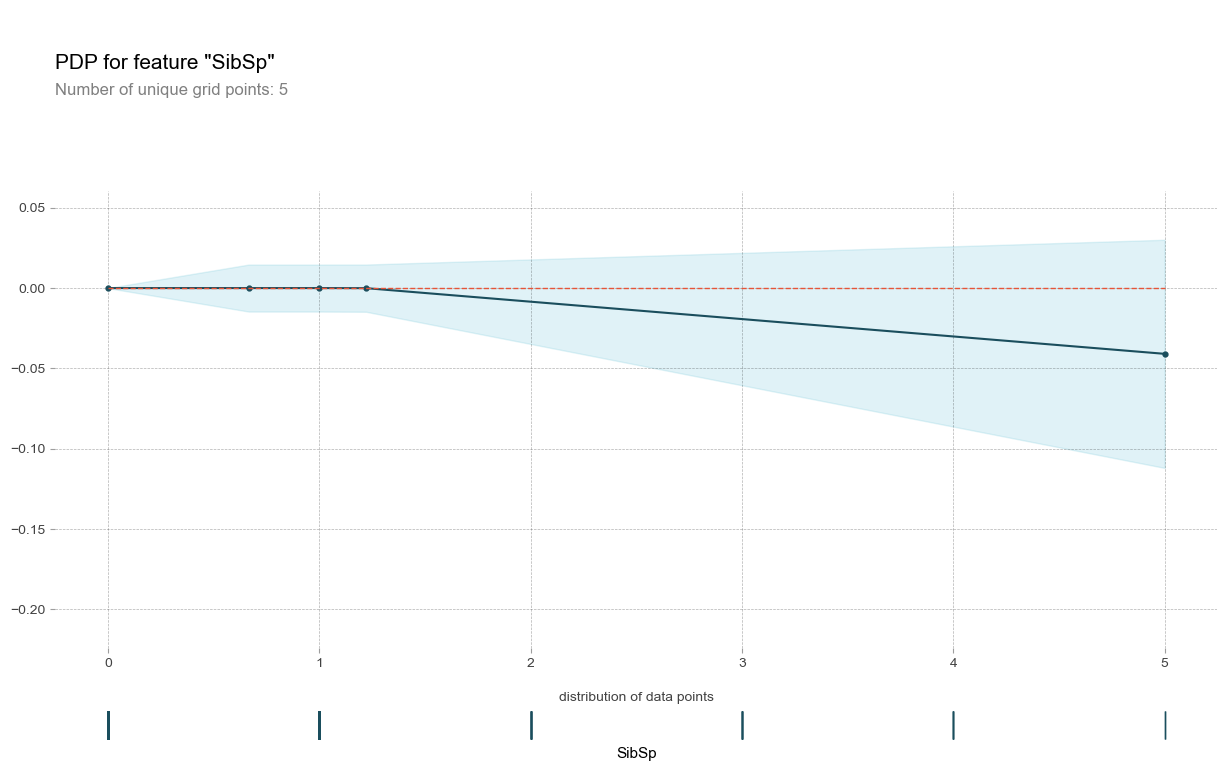

In [24]:
#Feature 2: SibSp

# Create the data that we will plot
pdp_SibSp_BB2 = pdp.pdp_isolate(model=BB2_model, dataset=val_X, model_features=feature_names, feature='SibSp')

# Plot it
pdp.pdp_plot(pdp_SibSp_BB2, 'SibSp', plot_pts_dist=True)
plt.show()

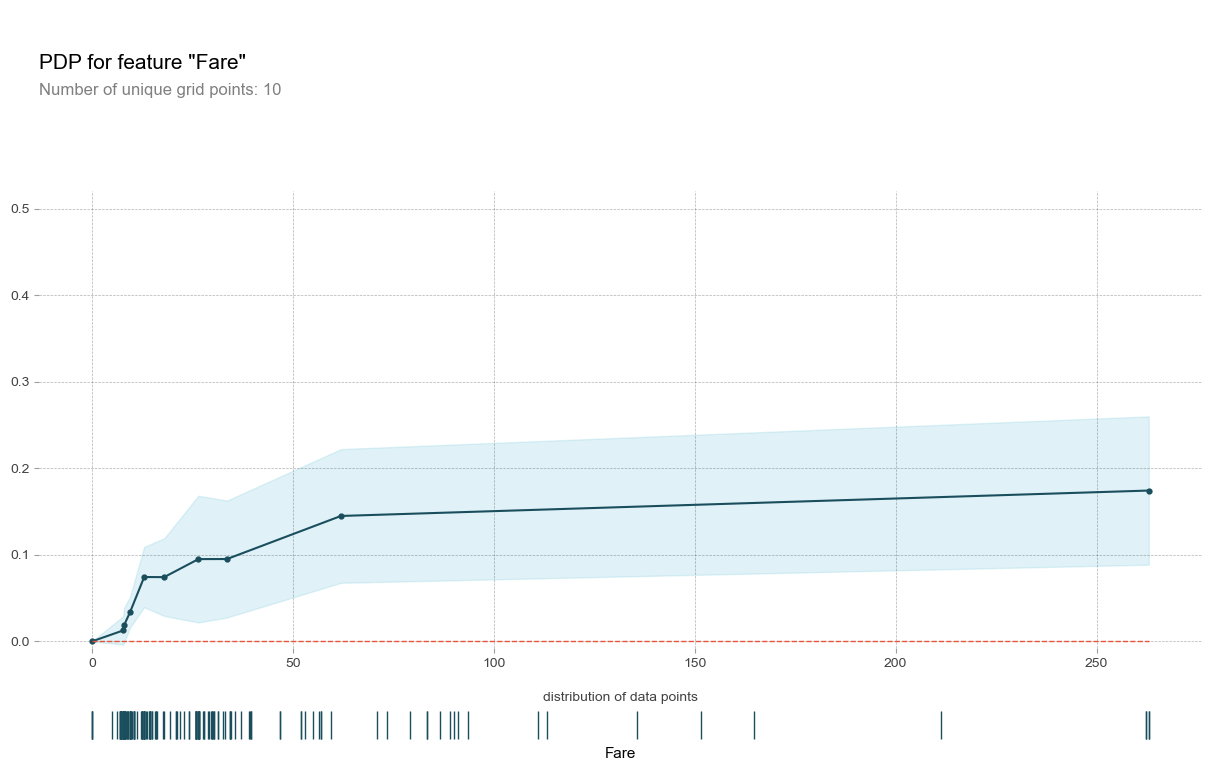

In [25]:
#Feature 3: Fare

# Create the data that we will plot
pdp_Fare_BB2 = pdp.pdp_isolate(model=BB2_model, dataset=val_X, model_features=feature_names, feature='Fare')

# Plot it
pdp.pdp_plot(pdp_Fare_BB2, 'Fare', plot_pts_dist=True)
plt.show()